# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [0]:
from google.colab import files
import io
uploaded = files.upload()


Saving European Measurements.xlsx to European Measurements.xlsx


In [0]:
xlsx = pd.ExcelFile(io.BytesIO(uploaded['European Measurements.xlsx']))
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [0]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        for event in range(len(data)):
            error = 0;
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[5859 4186 3257 1476]
 [6061 6857 3469 1972]
 [6139 5638 1011 6153]
 ...
 [5673 7650 2557 7175]
 [4062 2365 7653 2490]
 [ 640 7285 1986 8789]]

Evolution:
Generation =  0 	Best fitness =  3885361606.00274
Generation =  1 	Best fitness =  2529729749.16609
Generation =  2 	Best fitness =  2372193472.73747
Generation =  3 	Best fitness =  10072967.40429
Generation =  4 	Best fitness =  10072967.40429
Generation =  5 	Best fitness =  5826400.75182
Generation =  6 	Best fitness =  5826400.75182
Generation =  7 	Best fitness =  4613018.42345
Generation =  8 	Best fitness =  57861.34392
Generation =  9 	Best fitness =  57861.34392
Generation =  10 	Best fitness =  4754.95058
Generation =  11 	Best fitness =  3131.09069
Generation =  12 	Best fitness =  3131.09069
Generation =  13 	Best fitness =  3131.09069
Generation =  14 	Best fitness =  3131.09069
Generation =  15 	Best fitness =  1928.86541
Generation =  16 	Best fitness =  1928.86541
Generation 

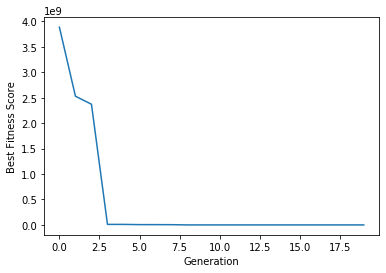

In [0]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [0]:
#1
def biased_selection(pop, fitness, num_parents):
    # weigh the score for each parent
    weighted_fit=[fit/np.sum(fitness) for fit in fitness]
    #choose indices of parents according to probability given from the relative weights
    parents=np.random.choice(np.arange(len(fitness)),size=num_parents,p=weighted_fit)
    return pop[parents,:]

#2
def recombination(parents, offspring_size):
    offspring = np.zeros(offspring_size).astype(int)
    
    def choose_parents(parents):
    #choose at random parents
        parent1=parents[np.random.randint(0,parents.shape[0])]
        # avoid mating with oneself
        available_mates=parents[(parents!=parent1).sum(axis=1)>0]
        if available_mates.shape[0]<1:
          parent2=parent1
        else:
          parent2=available_mates[np.random.randint(0,available_mates.shape[0])]
        return parent1,parent2
       
    for i in range(offspring_size[0]):
        parent1,parent2=choose_parents(parents)
        # randox choose features from parent 1
        random_features=np.random.randint(0,2,size=offspring_size[1])
        inheritance1=parent1*random_features
        #choose completing features from parent 2
        inheritance2=parent2*(1-(random_features==1).astype(int))
        #combine
        offspring[i]=inheritance1+inheritance2
    return offspring

#3
def mutation(offspring_recombination,mutation_chance=0.1):
    for idx in range(offspring_recombination.shape[0]):
        #for each instance,create a series of features to be mutated
        mutate_feature=np.random.choice([0,1],size=offspring_recombination.shape[1],p=[1-mutation_chance,mutation_chance])
        #mutate by different value for every selected feature
        random_value = np.random.randint(-100, 100, offspring_recombination.shape[1])
        offspring_recombination[idx, :] += mutate_feature * random_value
    return offspring_recombination
  

The population of the first generation: 
[[5403   78 1231 1895]
 [4274 2010 8676 8411]
 [2095 6303 8740 1765]
 ...
 [4918  221 3548 7973]
 [9303  673 3602 1415]
 [1971 3014 5820  384]]

Evolution:
Generation =  0 	Best fitness =  18027739764.72482
Generation =  1 	Best fitness =  2041823745.1363
Generation =  2 	Best fitness =  10229883.14205
Generation =  3 	Best fitness =  7846.62008
Generation =  4 	Best fitness =  88.71474
Generation =  5 	Best fitness =  0.00659
Generation =  6 	Best fitness =  0.00659
Generation =  7 	Best fitness =  0.00659
Generation =  8 	Best fitness =  0.00659
 stopped after 8 genarations due to lack of improvement for 3 generations straight

The population of the last generation: 
[[ -35   90 2939 5306]
 [ -35   90 2939 5306]
 [ -35   90 2939 5306]
 ...
 [ -38  264 1287 5297]
 [ -35   90 2939 5306]
 [ -35  264 1287 5306]]
Best solution:  [[[ -35   90 2939 5306]
  [ -35   90 2939 5306]
  [ -35   90 2939 5306]
  ...
  [ -35   90 2939 5306]
  [ -35   90 2939 5

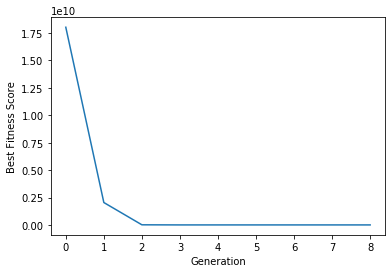

In [0]:
# GA Parameters
formula_degree = 4
number_of_solutions = 1000
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
#added for challenge no.4
tol=0.1
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=(1000,formula_degree))
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    best_outputs.append(round(1/np.max(fitness),5))
    #4 - early stopping criteria:
    if (generation>1):
      if (np.abs(best_outputs[generation-2]-best_outputs[generation])<tol)&(np.abs(best_outputs[generation-3]-best_outputs[generation])<tol):
        print(" stopped after {} genarations due to lack of improvement for 3 generations straight".format(generation))
        break

    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()



## Part 2: Solving Different Problems With the Same GA

In [25]:
uploaded = files.upload()


Saving EMR-Blood.xlsx to EMR-Blood.xlsx


Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

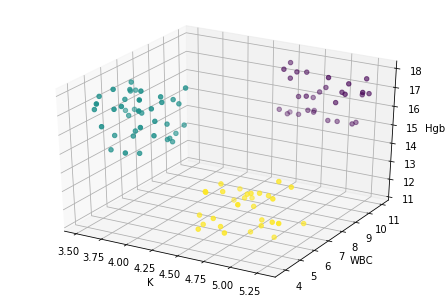

In [26]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


xlsx = pd.ExcelFile(io.BytesIO(uploaded['EMR-Blood.xlsx']))
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import squareform

from sklearn.metrics import  silhouette_score

# in this solution we'll initialize different cluster centroids and evolve the fittest ones according to a chi-score (that balnces within and between  group distances)

def generate_ranom_centroids(data,rows):
    return np.concatenate(([np.random.uniform(low=np.min(data[:,i]),high=np.max(data[:,i]),size=(rows,1)) for i in range(data.shape[1])]),axis=1)
    
def chscore(data,centroids):
    WCSS=np.sum(np.min(euclidean_distances(data,centroids),axis=0))
    BCSS=np.sum(euclidean_distances(centroids,centroids),axis=1)
    return BCSS*(data.shape[0]-data.shape[1])*(WCSS*(data.shape[1]-1))


def recombination(parents, offspring_size):
    offspring = np.zeros(offspring_size)
    
    def choose_parents(parents):
    #choose at random parents
        parent1=parents[np.random.randint(0,parents.shape[0])]
        # avoid mating with oneself
        available_mates=parents[(parents!=parent1).sum(axis=1)>0]
        if available_mates.shape[0]<1:
          print("lack of mating diversity")
          parent2=parent1
        else:
          parent2=available_mates[np.random.randint(0,available_mates.shape[0])]
        return parent1,parent2
       
    for i in range(offspring_size[0]):
        parent1,parent2=choose_parents(parents)
        # randox choose features from parent 1
        random_features=np.random.randint(0,2,size=offspring_size[1])
        inheritance1=parent1*random_features
        #choose completing features from parent 2
        inheritance2=parent2*(1-(random_features==1).astype(int))
        #combine
        offspring[i]=(inheritance1+inheritance2)
    return offspring


def mutation(offspring_recombination,mutation_chance=0.1):
    for idx in range(offspring_recombination.shape[0]):
        mutate_feature=np.random.choice([0,1],size=offspring_recombination.shape[1],p=[1-mutation_chance,mutation_chance])
                        
        random_value = np.random.uniform(np.min(offspring_recombination), np.max(offspring_recombination), offspring_recombination.shape[1])
        offspring_recombination[idx, :] += mutate_feature * random_value
    return offspring_recombination

Generation =  0 	Silhouette score =  0.1446956460276587 number of k's:  32
Generation =  1 	Silhouette score =  0.10258238744102867 number of k's:  25
Generation =  2 	Silhouette score =  0.12082152157239263 number of k's:  19
Generation =  3 	Silhouette score =  0.1186799395019686 number of k's:  14
Generation =  4 	Silhouette score =  0.18515990836062046 number of k's:  11
Generation =  5 	Silhouette score =  0.22943305245077528 number of k's:  9
Generation =  6 	Silhouette score =  0.2946991390210454 number of k's:  8
Generation =  7 	Silhouette score =  0.3022401515909368 number of k's:  8
Generation =  8 	Silhouette score =  0.4275421278350474 number of k's:  4
Generation =  9 	Silhouette score =  0.16434529754030344 number of k's:  3
broke at 10th generation due to lack of diversity in predictions
Best Generation =  8 	Silhouette score =  0.4275421278350474 number of k's:  4


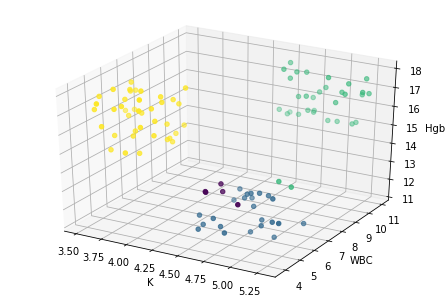

In [44]:
features=EMR3d1.shape[1]
initial_centroids=100
num_parents=int(initial_centroids*.5)
pop_size = (initial_centroids,features) 
number_of_generations = 1000
tol=0.1
best_outputs = []

#create dictionaries to save 2 properties: best silhouette scores and best predictions for each generation
sil={}
predictions={}


#genesis
centroid=generate_ranom_centroids(EMR3d1,initial_centroids)    

for generation in range(number_of_generations):
    #create a prediction vector according to current generation's available centroids
    labels=np.argmin(euclidean_distances(EMR3d1,centroid),axis=1)
    #Eventually we'll get a prediction vector that converges into a single label, when that happens we don't have any room for further evolvment
    if len(np.unique(labels))<2:
        print("broke at {}th generation due to lack of diversity in predictions".format(generation))
        break
    predictions[generation]=labels
    sil[generation]=silhouette_score(EMR3d1, labels)
    #create a chi-score to bias selectcentroids for next generations
    chi=chscore(EMR3d1,centroid)

    print("Generation = ", generation, "\tSilhouette score = ", silhouette_score(EMR3d1, labels),"number of k's: ", len(np.unique(labels)))
    
    parents = biased_selection(centroid, chi, num_parents)
    offspring_recombination = recombination(parents, offspring_size=(centroid.shape[0]-num_parents, centroid.shape[1]))        
    offspring_mutation = mutation(offspring_recombination)
    centroid[0:num_parents, :] = parents
    centroid[num_parents:, :] = offspring_mutation

#choose best generation outcomes
best_sil=np.max(list(sil.values()))  
best_gen=list(sil.values()).index(best_sil)
best_labels=predictions[best_gen]
best_labels=pd.Series(best_labels).replace({np.unique(best_labels)[i]:i for i in range(len(np.unique(best_labels)))})
optimal_ks=len(np.unique(best_labels))
make_chart(EMR3d1, best_labels, variables1)
print("Best Generation = ", best_gen, "\tSilhouette score = ", best_sil,"number of k's: ", optimal_ks)

unfortounatley the evolvement happens to fast, we can see a steep jump between different k's.
after a bit of wxpirementation, we added some restrictions to the chi score vector we fed into the parent selector in order to moderate the rate of centroid evolvement

Generation =  0 	Silhouette score =  0.1628642051364242 number of k's:  35
Generation =  1 	Silhouette score =  -0.01959209206424843 number of k's:  33
Generation =  2 	Silhouette score =  0.13413140777581492 number of k's:  24
Generation =  3 	Silhouette score =  0.14197786813063726 number of k's:  24
Generation =  4 	Silhouette score =  0.13959955866420173 number of k's:  27
Generation =  5 	Silhouette score =  0.18375162019327843 number of k's:  20
Generation =  6 	Silhouette score =  0.23933693868308317 number of k's:  21
Generation =  7 	Silhouette score =  0.261071862198753 number of k's:  16
Generation =  8 	Silhouette score =  0.242283268555382 number of k's:  15
Generation =  9 	Silhouette score =  0.19052549156941329 number of k's:  17
Generation =  10 	Silhouette score =  0.10346094024216612 number of k's:  16
Generation =  11 	Silhouette score =  0.20375613331638978 number of k's:  17
Generation =  12 	Silhouette score =  0.2380674699955846 number of k's:  14
Generation =  

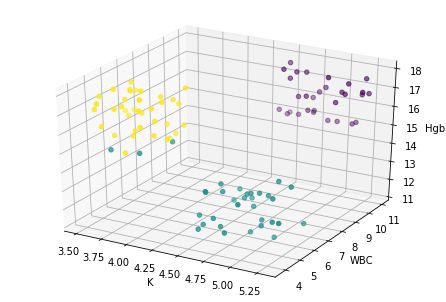

In [39]:
features=EMR3d1.shape[1]
initial_centroids=100
num_parents=int(initial_centroids*.5)
pop_size = (initial_centroids,features) 
number_of_generations = 1000
tol=0.1
best_outputs = []

#create dictionaries to save 2 properties: best silhouette scores and best predictions for each generation
sil={}
predictions={}


#genesis
centroid=generate_ranom_centroids(EMR3d1,initial_centroids)    

for generation in range(number_of_generations):
    #create a prediction vector according to current generation's available centroids
    labels=np.argmin(euclidean_distances(EMR3d1,centroid),axis=1)
    #Eventually we'll get a prediction vector that converges into a single label, when that happens we don't have any room for further evolvment
    if len(np.unique(labels))<2:
        print("broke at {}th generation due to lack of diversity in predictions".format(generation))
        break
    predictions[generation]=labels
    sil[generation]=silhouette_score(EMR3d1, labels)
    #create a chi-score to bias selectcentroids for next generations
    chi=chscore(EMR3d1,centroid)
    # moderate the rate of change to favor bigger clusters 
    chi[np.unique(labels, return_counts=True)[0]]*=np.unique(labels, return_counts=True)[1]
 

    print("Generation = ", generation, "\tSilhouette score = ", silhouette_score(EMR3d1, labels),"number of k's: ", len(np.unique(labels)))
    
    parents = biased_selection(centroid, chi, num_parents)
    offspring_recombination = recombination(parents, offspring_size=(centroid.shape[0]-num_parents, centroid.shape[1]))        
    offspring_mutation = mutation(offspring_recombination)
    centroid[0:num_parents, :] = parents
    centroid[num_parents:, :] = offspring_mutation

#choose best generation outcomes
best_sil=np.max(list(sil.values()))  
best_gen=list(sil.values()).index(best_sil)
best_labels=predictions[best_gen]
best_labels=pd.Series(best_labels).replace({np.unique(best_labels)[i]:i for i in range(len(np.unique(best_labels)))})
optimal_ks=len(np.unique(best_labels))
make_chart(EMR3d1, best_labels, variables1)
print("Best Generation = ", best_gen, "\tSilhouette score = ", best_sil,"number of k's: ", optimal_ks)


We can see that in terms of finding an optimal solution this methodworks fine, but we geta lot of back and forth in terms of silhouette scores.

we belive that a further optimization to the weighting method is requiered but this solution is good enough to solve this specific classification problem

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [0]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

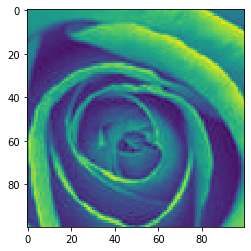

In [0]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [0]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [0]:
# Your code here